In [56]:
import matplotlib.pyplot as mp
import pandas as pd
import numpy as np
data = df = pd.read_csv("impacts.csv")
Label=np.zeros(len(data))
i=0
while i<len(data):
    if (df.iloc[i]["MaximumPalermoScale"] < -8):
        Label[i] = 0
    elif (df.iloc[i]["MaximumPalermoScale"] < -6):
        Label[i] = 1
    elif (df.iloc[i]["MaximumPalermoScale"] < -4):
        Label[i] = 2   
    elif (df.iloc[i]["MaximumPalermoScale"] < -2):
        Label[i] = 3
    else:
        Label[i] = 4   
    i+=1
data["Label"]=Label
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
featureCols=["PossibleImpacts","CumulativeImpactProbability","AsteroidVelocity","AsteroidMagnitude","AsteroidDiameter","CumulativePalermoScale"]
X=data[featureCols]
y=data.Label
trainX,testX,trainY,testY=train_test_split(X,y,test_size=0.3,random_state=1)
scaler=StandardScaler()
scaler.fit(trainX)
trainX=scaler.transform(trainX)
testX=scaler.transform(testX)
clf=KNeighborsClassifier(n_neighbors=24)
clf.fit(trainX,trainY)
predY=clf.predict(testX)
print("Accuracy:",round(100*metrics.accuracy_score(testY,predY),2),"%")



Accuracy: 83.41 %


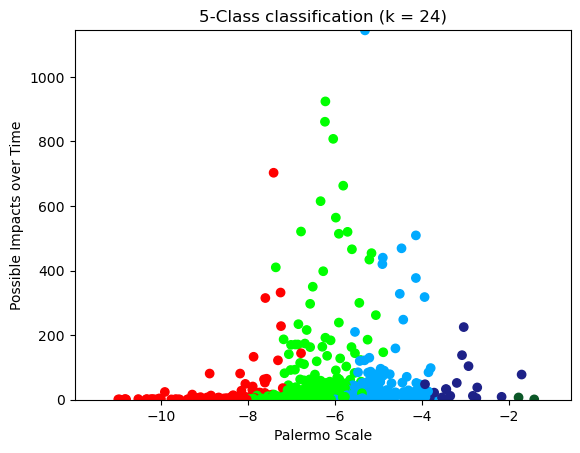

In [57]:


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 24

h = 0.2

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF',"#1D2188","#0B5727"])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF',"#1D2188","#0B5727"])
#red,green,light blue,dark blue, dark green

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)


x_min, x_max = X.CumulativePalermoScale.min() -1, X.CumulativePalermoScale.max() + 1
y_min, y_max = X.PossibleImpacts.min() - 1, X.PossibleImpacts.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))


plt.figure()

plt.scatter(X.CumulativePalermoScale, X.PossibleImpacts, c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("5-Class classification (k = %i)" % (n_neighbors))
plt.xlabel("Palermo Scale")
plt.ylabel("Possible Impacts over Time")
plt.show()
